# TRAIN THE ML MODEL ON ANEMIA DATASET

I am going to implement the following three algorithms to train Machine Learning models on our dataset and compare the accuracy:
- **Logistic Regression**
- **SVM**
- **Decision Tree**

***IMPORTING NECESSARY LIBRARIES***

In [4]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt

***IMPORTING DATASET***

In [5]:
dataset = pd.read_csv("E:\\7th Semester\\FYP\\Projects\\Github Repo\\GitHub\\Synthetic_data.csv")
dataset.head()

,Conclusion,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
0,2,-0.482742,-0.649103,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.688728,-0.387711,1.341533,0.021847,0.448553,-0.066939,0.442635,0.478757,0.584571,-0.136685
1,2,0.967966,-0.649103,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,-0.453965,-0.624089,-0.242688,-0.628659,-0.127202,-0.162824,-0.897701,-0.037930,-1.231430,-0.136685
2,5,0.669290,0.779377,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.328577,-0.624089,-0.242688,-0.628659,-0.645380,-0.162824,-1.291291,-0.567068,-1.435596,-0.194961
3,4,-0.482742,-0.434587,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.289632,-0.651898,0.779687,-0.826135,-0.213565,0.668175,-0.732818,-0.137532,-0.060163,-0.026321
4,3,0.327947,-0.775863,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,-0.031393,-0.554566,-0.003213,1.113769,-0.443866,1.531136,-1.227466,-0.355413,-1.080992,-0.194961


***CHECKING ANY NULL VALUES***

In [6]:
print(dataset.isna().sum(axis=0))

Conclusion         0
HGB(g/dL)          0
PLT(10^3/uL)       0
Judgment           0
Positive(Diff.)    0
                  ..
[Delta-He(pg)]     0
[RET-Y(ch)]        0
[RET-RBC-Y(ch)]    0
[IRF-Y(ch)]        0
[FRC#(10^6/uL)]    0
Length: 67, dtype: int64


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Conclusion                        1000 non-null   int64  
 1   HGB(g/dL)                         1000 non-null   float64
 2   PLT(10^3/uL)                      1000 non-null   float64
 3   Judgment                          1000 non-null   float64
 4   Positive(Diff.)                   1000 non-null   float64
 5   Positive(Morph.)                  1000 non-null   float64
 6   Positive(Count)                   1000 non-null   float64
 7   RBC Abnormal                      1000 non-null   float64
 8   RBC Suspect                       1000 non-null   float64
 9   PLT Abnormal                      1000 non-null   float64
 10  PLT Suspect                       1000 non-null   float64
 11  IP ABN(RBC)RBC Abn Distribution   1000 non-null   float64
 12  IP ABN(

In [8]:
dataset.describe()

,Conclusion,HGB(g/dL),PLT(10^3/uL),Judgment,Positive(Diff.),Positive(Morph.),Positive(Count),RBC Abnormal,RBC Suspect,PLT Abnormal,...,[MicroR(%)],[MacroR(%)],[RBC-O(10^6/uL)],[PLT-O(10^3/uL)],[RBC-He(pg)],[Delta-He(pg)],[RET-Y(ch)],[RET-RBC-Y(ch)],[IRF-Y(ch)],[FRC#(10^6/uL)]
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.523000,-0.029140,0.008076,0.938000,0.660000,0.884000,0.85000,0.737000,0.409000,0.664000,...,0.036579,0.005288,0.008807,-0.043069,-0.015419,0.002956,0.026849,-0.023649,0.050791,0.105166
std,5.132037,1.034691,0.991993,0.241276,0.473946,0.320385,0.35725,0.440483,0.491895,0.472575,...,1.080250,0.996072,1.044631,0.968976,1.046632,0.960201,1.040819,1.067419,1.004323,1.395777
min,0.000000,-2.018786,-0.785613,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,-0.853062,-0.929990,-1.974279,-0.878407,-3.092336,-2.847590,-2.333774,-3.885072,-2.311359,-0.194961
25%,3.000000,-0.738750,-0.683231,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,...,-0.602648,-0.526757,-0.776902,-0.797094,-0.645380,-0.546362,-0.732818,-0.573293,-0.688778,-0.173665
50%,5.000000,-0.098731,-0.493092,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,...,-0.289632,-0.380759,-0.067687,-0.538634,-0.012051,-0.066939,0.099573,0.074123,0.133258,-0.136685
75%,9.000000,0.498619,0.637992,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,0.344228,0.140663,0.669160,0.620081,0.563704,0.668175,0.798994,0.590810,0.885447,-0.057689
max,22.000000,3.570706,4.006866,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.180337,5.855442,3.773128,4.180442,2.722782,2.458019,1.830839,2.240474,1.960004,9.174685


***SEPARATING TARGET AND FEATURES***

In [9]:
X = dataset.iloc[:, 1:]
Y = dataset.iloc[:, 0]

In [10]:
print(X)

     HGB(g/dL)  PLT(10^3/uL)  Judgment  Positive(Diff.)  Positive(Morph.)  \
0    -0.482742     -0.649103       1.0              1.0               1.0   
1     0.967966     -0.649103       1.0              1.0               1.0   
2     0.669290      0.779377       1.0              0.0               1.0   
3    -0.482742     -0.434587       1.0              1.0               1.0   
4     0.327947     -0.775863       1.0              1.0               1.0   
..         ...           ...       ...              ...               ...   
995   0.242612     -0.614976       1.0              0.0               1.0   
996   0.711958      0.779377       1.0              1.0               1.0   
997   0.114608      1.330293       1.0              1.0               1.0   
998  -1.378768      1.330293       1.0              0.0               1.0   
999  -0.525410     -0.649103       1.0              0.0               1.0   

     Positive(Count)  RBC Abnormal  RBC Suspect  PLT Abnormal  PLT Suspect 

In [11]:
print(Y)

0       2
1       2
2       5
3       4
4       3
       ..
995     4
996     5
997    16
998    16
999     2
Name: Conclusion, Length: 1000, dtype: int64


In [12]:
print(Y.unique())

[ 2  5  4  3  7 21  9  1 13 18 16  0 11 12 10 15 17 14  8 22  6 19 20]


***SEPARATING TEST AND TRAINING DATA***

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

# TRAINING THE LOGISTIC REGRESSION MODEL

In [14]:
#Training the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)

C:\Users\MEB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***DRAWING PREDICTIONS ON TEST DATASET***

In [15]:
predictions = LR.predict(X_test)

In [16]:
#Finding the confusion matrix
from sklearn.metrics import mean_squared_error, confusion_matrix
MSE = mean_squared_error(Y_test, predictions)
print(MSE)

16.97


# Training the Support Vector Machine (SVM) on Anemia dataset

***SVC WITHOUT ANY PARAMETERS***

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [18]:
predictions = model.predict(X_test)

#Printing score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy = ", (round((accuracy_score(Y_test, predictions))*100)))

Accuracy =  29


***SVC WITH KERNEL RBF***

In [19]:
from sklearn.svm import SVC
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, Y_train)

SVC()

In [20]:
predictions = model_rbf.predict(X_test)

#Printing score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy = ", (round((accuracy_score(Y_test, predictions))*100)))

Accuracy =  29


***TRAINING THE SVC WITH POLYNOMIAL KERNEL***

In [21]:
# from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.svm import SVC

# degrees = [0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
# acc = []
# for degree in degrees:
#     svc = SVC(kernel='poly', degree=degree).fit(X_train, Y_train)
#     predictions_poly = model_poly.predict(X_test)
#     temp = accuracy_score(Y_test, predictions_poly)
#     acc.append(temp)
    

# print(max(acc))
# print(acc.index(max(acc)))


#Training the model
model_poly = SVC(kernel='poly', degree=7, gamma=2)
model_poly.fit(X_train, Y_train)

SVC(degree=7, gamma=2, kernel='poly')

In [22]:
predictions_poly = model_poly.predict(X_test)

#Printing score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy = ", (round((accuracy_score(Y_test, predictions_poly))*100)))

Accuracy =  14


***TRAINING THE SVC MODEL WITH LINEAR KERNEL***

In [23]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, Y_train)

SVC(kernel='linear')

In [24]:
predictions_linear = model_linear.predict(X_test)

#Printing score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy = ", (round((accuracy_score(Y_test, predictions_linear))*100)))

Accuracy =  75


***TRAINING THE SVC MODEL WITH SIGMOID KERNEL***

In [25]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [26]:
predictions_sig = model_linear.predict(X_test)

#Printing score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy = ", (round((accuracy_score(Y_test, predictions_sig))*100)))

Accuracy =  75


# Training the model with Decision Tree Classifier

***FINDING WHICH PARAMETERS ARE IMPORTANT***

In [27]:
# Feature selection by ExtraTreesRegressor(model based)
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()
reg.fit(X_train, Y_train)

ExtraTreesRegressor()

In [28]:
reg.feature_importances_

array([7.23603250e-04, 2.17706603e-01, 0.00000000e+00, 1.37217631e-05,
       2.22800197e-05, 6.51054322e-05, 3.39788058e-06, 6.85116925e-05,
       1.85842854e-02, 0.00000000e+00, 9.10961867e-07, 1.14335414e-04,
       1.31149478e-04, 2.45357538e-04, 0.00000000e+00, 1.38854109e-06,
       9.02323864e-05, 2.11150326e-02, 3.60591409e-06, 2.02513193e-04,
       3.38916394e-02, 1.50539397e-01, 2.59015957e-02, 0.00000000e+00,
       6.95899100e-05, 2.79073746e-02, 2.09019746e-03, 2.74997757e-04,
       3.93751678e-02, 1.34338435e-04, 9.83221095e-05, 4.56661043e-02,
       6.19016659e-05, 3.58969894e-05, 6.61995684e-02, 2.94437654e-04,
       4.05295686e-05, 4.13708305e-05, 1.00297697e-04, 0.00000000e+00,
       5.78000174e-02, 8.68320924e-02, 1.03581662e-01, 2.15944928e-04,
       4.04734743e-05, 1.03667203e-04, 1.06882992e-05, 1.44868128e-04,
       8.56042526e-05, 1.10492373e-04, 2.17406151e-04, 1.67230111e-04,
       7.94640424e-04, 3.77072560e-04, 3.85079924e-05, 1.42391854e-04,
      

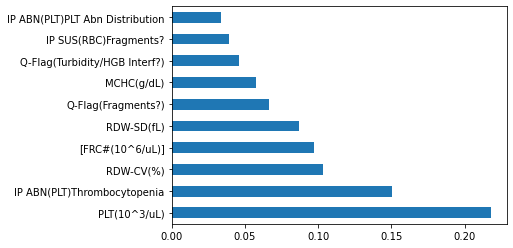

In [29]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
# Traning model with all features 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=0)

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision_model=DecisionTreeClassifier()
# fit independent varaibles to the dependent variables
decision_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
decision_model.score(X_train,y_train)

1.0

In [33]:
predictions_decision = decision_model.predict(X_test)

#Printing score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy = ", (round((accuracy_score(Y_test, predictions_decision))*100)))

Accuracy =  8
